In [1]:
import recordlinkage as rl
import itertools as it
from recordlinkage.standardise import clean
from recordlinkage.preprocessing import phonetic
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from io import StringIO

In [2]:
df_tracks = pd.read_csv('C:/Users/lu/OneDrive/FOM/7_Semester/BA/BA-code/data/tracks.csv')
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [3]:
df_tracks.info

<bound method DataFrame.info of                             id                                 name  \
0       35iwgR4jXetI318WEWsa1Q                                Carve   
1       021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista   
2       07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado   
3       08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado   
4       08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening   
...                        ...                                  ...   
586667  5rgu12WBIHQtvej2MdHSH0                                  云与海   
586668  0NuWgxEp51CutD2pJoF4OM                                blind   
586669  27Y1N4Q4U3EfDU5Ubw8ws2            What They'll Say About Us   
586670  45XJsGpFTyzbzeWK8VzR8S                      A Day At A Time   
586671  5Ocn6dZ3BJFPWh4ylwFXtn                     Mar de Emociones   

        popularity  duration_ms  explicit                          artists  \
0                6       126903      

In [4]:
most_popular = df_tracks.query('popularity > 50', inplace = False).sort_values('popularity', ascending = False)
extract = pd.DataFrame(most_popular[:1000])
extract.to_csv('C:/Users/lu/OneDrive/FOM/7_Semester/BA/BA-code/data_extract/extract.csv')

In [5]:
data_dirty = pd.read_csv('C:/Users/lu/OneDrive/FOM/7_Semester/BA/BA-code/data_extract/test_2/data_dirty_t2.csv')
data_dirty.head()

,name,artists,duration_ms
0,Peeches (feat. Daniel Caesar & Giveon),"['Justin Bieber', 'Daniel Caesar', 'Giveon']",198082
1,driwers license,['Olivia Rodrigo'],242014
2,Astronout In The Ocean,['Masked Wolf'],132780
3,Save Yuor Tears,['The Weeknd'],215627
4,telepatía,['Kali Uhcis'],160191


In [6]:
data_clean = pd.read_csv('C:/Users/lu/OneDrive/FOM/7_Semester/BA/BA-code/data_extract/test_2/data_clean_t2.csv')
data_clean.head()

,name,artists,duration_ms
0,Peaches (feat. Daniel Caesar & Giveon),"['Justin Bieber', 'Daniel Caesar', 'Giveon']",198082
1,drivers license,['Olivia Rodrigo'],242014
2,Astronaut In The Ocean,['Masked Wolf'],132780
3,Save Your Tears,['The Weeknd'],215627
4,telepatía,['Kali Uchis'],160191


In [7]:
data_dirty = data_dirty.astype(str).apply(lambda x: x.str.lower())
data_dirty['name'] = data_dirty['name'] = data_dirty['name'].str.replace("[\'\".,()[*\]+\&\/\-\\\+\!\%:;?]","")
data_dirty['artists'] = data_dirty['artists'] = data_dirty['artists'].str.replace("[\'\".,()[*\]+\&\/\-\\\+\!\%:;?]","")
data_dirty.head()

C:\Users\lu\AppData\Local\Temp\ipykernel_12860\1163726803.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_dirty['name'] = data_dirty['name'] = data_dirty['name'].str.replace("[\'\".,()[*\]+\&\/\-\\\+\!\%:;?]","")
C:\Users\lu\AppData\Local\Temp\ipykernel_12860\1163726803.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data_dirty['artists'] = data_dirty['artists'] = data_dirty['artists'].str.replace("[\'\".,()[*\]+\&\/\-\\\+\!\%:;?]","")


,name,artists,duration_ms
0,peeches feat daniel caesar giveon,justin bieber daniel caesar giveon,198082
1,driwers license,olivia rodrigo,242014
2,astronout in the ocean,masked wolf,132780
3,save yuor tears,the weeknd,215627
4,telepatía,kali uhcis,160191


In [8]:
data_clean = data_clean.astype(str).apply(lambda x: x.str.lower())
data_clean['name'] = data_clean['name'] = data_clean['name'].str.replace("[\'\".,()[*\]+\&\/\-\\\+\!\%:;?]","")
data_clean['artists'] = data_clean['artists'] = data_clean['artists'].str.replace("[\'\".,()[*\]+\&\/\-\\\+\!\%:;?]","")
data_clean.head()

C:\Users\lu\AppData\Local\Temp\ipykernel_12860\1620201051.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_clean['name'] = data_clean['name'] = data_clean['name'].str.replace("[\'\".,()[*\]+\&\/\-\\\+\!\%:;?]","")
C:\Users\lu\AppData\Local\Temp\ipykernel_12860\1620201051.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data_clean['artists'] = data_clean['artists'] = data_clean['artists'].str.replace("[\'\".,()[*\]+\&\/\-\\\+\!\%:;?]","")


,name,artists,duration_ms
0,peaches feat daniel caesar giveon,justin bieber daniel caesar giveon,198082
1,drivers license,olivia rodrigo,242014
2,astronaut in the ocean,masked wolf,132780
3,save your tears,the weeknd,215627
4,telepatía,kali uchis,160191


In [9]:
data_clean['BKsoundex'] = phonetic(data_clean['artists'], method='nysiis')
#data_clean

In [10]:
data_clean['BKsoundex'] = phonetic(data_clean['artists'], method='nysiis')
#data_clean.head()

In [11]:
data_dirty['BKnysiis'] = phonetic(data_dirty['artists'], method='nysiis')
#data_dirty.head()

In [12]:
data_dirty['BKnysiis'] = phonetic(data_dirty['artists'], method='nysiis')
#data_dirty.head()

In [13]:
data_dirty['BKmetaphone_name'] = phonetic(data_dirty['name'], method='metaphone')
data_dirty['BKmetaphone_artists'] = phonetic(data_dirty['artists'], method='metaphone')
data_dirty['BKmetaphone_name-artists'] = data_dirty['BKmetaphone_name'].astype(str) + data_dirty['BKmetaphone_artists']
data_dirty.head()

,name,artists,duration_ms,BKnysiis,BKmetaphone_name,BKmetaphone_artists,BKmetaphone_name-artists
0,peeches feat daniel caesar giveon,justin bieber daniel caesar giveon,198082,JASTANBABARDANALCASARGAVAN,PXSFTTNLKSRJFN,JSTNBBRTNLKSRJFN,PXSFTTNLKSRJFNJSTNBBRTNLKSRJFN
1,driwers license,olivia rodrigo,242014,OLAVARADRAG,TRWRSLSNS,OLFRTRK,TRWRSLSNSOLFRTRK
2,astronout in the ocean,masked wolf,132780,MASCADWALF,ASTRNTN0SN,MSKTWLF,ASTRNTN0SNMSKTWLF
3,save yuor tears,the weeknd,215627,TAEACD,SFYRTRS,0WKNT,SFYRTRS0WKNT
4,telepatía,kali uhcis,160191,CALAC,TLPT,KLSS,TLPTKLSS


In [14]:
data_clean['BKmetaphone_name'] = phonetic(data_clean['name'], method='metaphone')
data_clean['BKmetaphone_artists'] = phonetic(data_clean['artists'], method='metaphone')
data_clean['BKmetaphone_name-artists'] = data_clean['BKmetaphone_name'].astype(str) + data_clean['BKmetaphone_artists']
data_clean.head()

,name,artists,duration_ms,BKsoundex,BKmetaphone_name,BKmetaphone_artists,BKmetaphone_name-artists
0,peaches feat daniel caesar giveon,justin bieber daniel caesar giveon,198082,JASTANBABARDANALCASARGAVAN,PXSFTTNLKSRJFN,JSTNBBRTNLKSRJFN,PXSFTTNLKSRJFNJSTNBBRTNLKSRJFN
1,drivers license,olivia rodrigo,242014,OLAVARADRAG,TRFRSLSNS,OLFRTRK,TRFRSLSNSOLFRTRK
2,astronaut in the ocean,masked wolf,132780,MASCADWALF,ASTRNTN0SN,MSKTWLF,ASTRNTN0SNMSKTWLF
3,save your tears,the weeknd,215627,TAEACD,SFYRTRS,0WKNT,SFYRTRS0WKNT
4,telepatía,kali uchis,160191,CALAC,TLPT,KLXS,TLPTKLXS


In [15]:
from recordlinkage.index import Full
full_index_t2 = Full().index(data_clean, data_dirty)
#print({len(df_dirty)*(len(df_dirty)-1)/2}, {len(full_index_t2)}, {len(df_dirty)})
print(len(full_index_t2))
#kp = it.product(data_extract_t2, dirty_only_t2)
#print(c(kp))

1000000


In [16]:
# Block Index BKmetaphone
from recordlinkage.index import Block
block_index_t2 = Block(left_on=['BKmetaphone_artists'])
block_index_t2 = block_index_t2.index(data_clean, data_dirty)
print({len(block_index_t2)}, {len(data_dirty)})
#block_index_pairs_BKmetaphone

{2694} {1000}


In [17]:
from recordlinkage.index import SortedNeighbourhood
neighbour_index_t2 = SortedNeighbourhood(left_on='BKmetaphone_artists', window=5)
neighbour_index_t2_BKmetaphone = neighbour_index_t2.index(data_clean, data_dirty)
print(len(neighbour_index_t2_BKmetaphone))
#neighbour_index_t2_BKmetaphone

8152


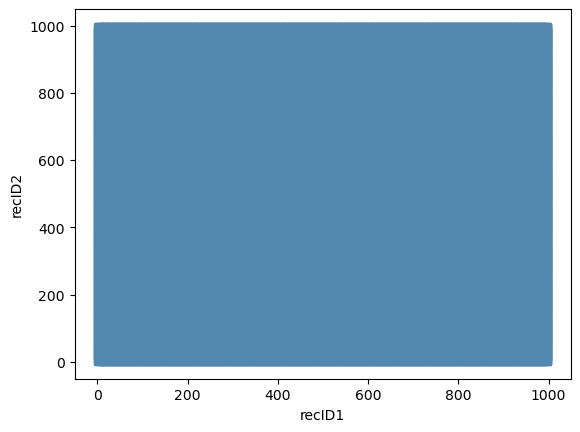

In [18]:
# Full Index  Visualization
full_index_df_vis = pd.MultiIndex.to_frame(full_index_t2, name=['recID1', 'recID2'])
#sns.pairplot(full_index_df_vis)
#sns.pairplot(full_index_df_vis, kind='hist')
full_index_df_vis.plot.scatter(
    x='recID1',
    y='recID2',
    marker='x',
    color='#5287AF')
plt.savefig('C:/Users/lu/OneDrive/FOM/7_Semester/BA/BA-code/viz/full_index')

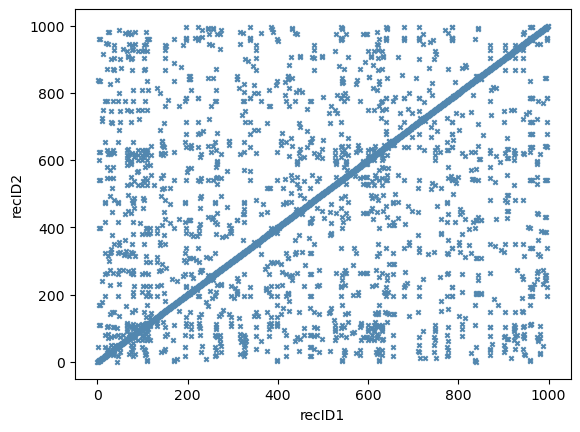

In [19]:
# Block Index BKmetaphone Visualization
block_index_pairs_BKmetaphone_vis = pd.MultiIndex.to_frame(block_index_t2, name=['recID1', 'recID2'])
block_index_pairs_BKmetaphone_vis.plot.scatter(
    x='recID1',
    y='recID2',
    marker='x',
    s=10,
    color='#5287AF')
plt.savefig('C:/Users/lu/OneDrive/FOM/7_Semester/BA/BA-code/viz/block_index_BKmetaphone')


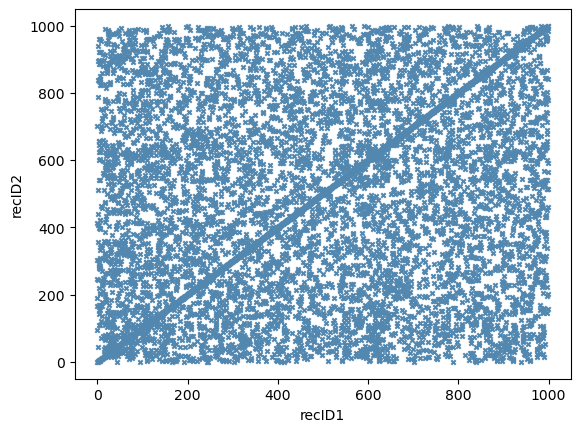

In [20]:
# Neighbour Index BKmetaphone Visualization

neighbour_index_pairs_BKmetaphon_vis = pd.MultiIndex.to_frame(neighbour_index_t2_BKmetaphone, name=['recID1', 'recID2'])
neighbour_index_pairs_BKmetaphon_vis.plot.scatter(
    x='recID1',
    y='recID2',
    marker='x',
    s=10,
    color='#5287AF')
plt.savefig('C:/Users/lu/OneDrive/FOM/7_Semester/BA/BA-code/viz/neighbour_index_BKmetaphone')


In [21]:
comp = rl.Compare()
comp.string('BKmetaphone_name-artists', method='jaro', right_on='BKmetaphone_name-artists', label='J')
comp.string('BKmetaphone_name-artists', method='jarowinkler', right_on='BKmetaphone_name-artists', label='JW')
comp.string('BKmetaphone_name-artists', method='levenshtein', right_on='BKmetaphone_name-artists', label='L')
comp.string('BKmetaphone_name-artists', method='damerau_levenshtein', right_on='BKmetaphone_name-artists', label='DL')
comp.string('BKmetaphone_name-artists', method='smith_waterman', right_on='BKmetaphone_name-artists', label='SW')
comp.string('BKmetaphone_name-artists', method='qgram', right_on='BKmetaphone_name-artists', label='QG')
comp.string('BKmetaphone_name-artists', method='lcs', right_on='BKmetaphone_name-artists', label='LCS')

comp_BKmetaphone = comp.compute(neighbour_index_t2_BKmetaphone, data_clean, data_dirty)
comp_BKmetaphone = comp_BKmetaphone[comp_BKmetaphone['J'] >= 0.800000]
comp_BKmetaphone = comp_BKmetaphone[comp_BKmetaphone['JW'] >= 0.800000]
comp_BKmetaphone = comp_BKmetaphone[comp_BKmetaphone['L'] >= 0.800000]
comp_BKmetaphone = comp_BKmetaphone[comp_BKmetaphone['DL'] >= 0.800000]
comp_BKmetaphone = comp_BKmetaphone[comp_BKmetaphone['SW'] >= 0.800000]
comp_BKmetaphone = comp_BKmetaphone[comp_BKmetaphone['QG'] >= 0.800000]
comp_BKmetaphone = comp_BKmetaphone[comp_BKmetaphone['LCS'] >= 0.800000]
comp_BKmetaphone.head()

,,J,JW,L,DL,SW,QG,LCS
0,0,1.000000,1.000000,1.0000,1.0000,1.000,1.000000,1.0000
1,1,0.958333,0.966667,0.9375,0.9375,0.875,0.882353,0.9375
43,43,0.896296,0.917037,0.9000,0.9000,0.800,0.818182,0.9000
839,839,1.000000,1.000000,1.0000,1.0000,1.000,1.000000,1.0000
2,2,1.000000,1.000000,1.0000,1.0000,1.000,1.000000,1.0000
